<a href="https://colab.research.google.com/github/euphoria96/KB_Smishing_dacon/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting
### Mounting google drive

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Download Mecab
Dacon에서 공개한(?) Window Mecab version

In [2]:
cd /content/gdrive/My Drive/Colab Notebooks/smishing/Mecab-ko-for-Google-Colab

/content/gdrive/My Drive/Colab Notebooks/smishing/Mecab-ko-for-Google-Colab


In [3]:
! bash install_mecab-ko_on_colab190912.sh

apt-get upgrade
apt install curl
apt install git
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
Done
Successfully Installed
Now you can use Mecab
from konlpy.tag import Mecab
mecab = Mecab()


### Import packages

In [0]:
# data preprocessing
import pandas as pd
import numpy as np
import random
from collections import Counter
from tqdm import tqdm # for checking time
import warnings
warnings.filterwarnings(action='ignore') 

### Load Data

In [4]:
cd /content/gdrive/My Drive/Colab Notebooks/smishing/

/content/gdrive/My Drive/Colab Notebooks/smishing


In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("public_test.csv")
submission=pd.read_csv("submission_제출양식.csv")
train.shape, test.shape, submission.shape

((295945, 4), (8105, 3), (8105, 2))

In [6]:
train.head()

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0


총 train data의 행은 약 29만개, test data의 행은 약 8천개로 되어있다.

In [0]:
train_nsm_idx=list(train[train['smishing']==0].index)
train_sm_idx=list(train[train['smishing']==1].index)

train_nsm = train.iloc[train_nsm_idx].reset_index(drop=True)
train_sm = train.iloc[train_sm_idx].reset_index(drop=True)

## Data Preparation
- smishing: 18703 / 295945 = 0.0631975535994864

In [0]:
RANDOM_SEED = 1234

### Tokenizing

In [0]:
from nltk.text import Text
from konlpy.tag import Mecab
tokenizer = Mecab()

In [0]:
stop_words = ['XXX', 'XXXXXX', '00',  #'10','25','c','55'
             '.', '-', '(', ')', ':', '!', '?', ')-', '.-', 'ㅡ', '..', '.(', '%','%(','-)',
             '을', '를', '이', '가', '은', '는','하','시','의','에', '한']

In [0]:
def tokenizing(text_list, maxcnt):
  tokens = []
  for text in text_list:
    token = tokenizer.morphs(text)
    for t in token:
      if t not in stop_words:
        tokens.append(t)
  cnt = Text(tokens, name='text')
  vocab = cnt.vocab().most_common(maxcnt)
  return vocab

In [0]:
vocab_all = tokenizing(train.text, 150)
vocab_nsm = tokenizing(train_nsm.text, 150)
vocab_sm = tokenizing(train_sm.text, 150)

### Visualization

In [0]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import platform
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [15]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumSquare


In [0]:
def word_cloud(vocab):
  wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
                     relative_scaling = 0.2,
                     background_color = 'white',
                     ).generate_from_frequencies(dict(vocab))
  plt.figure(figsize=(12,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show

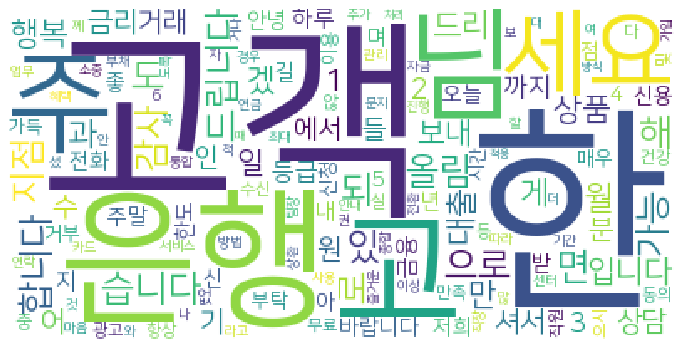

In [18]:
word_cloud(vocab_all)

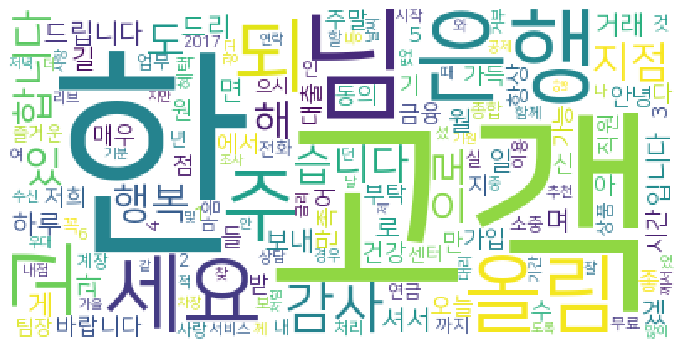

In [19]:
word_cloud(vocab_nsm)

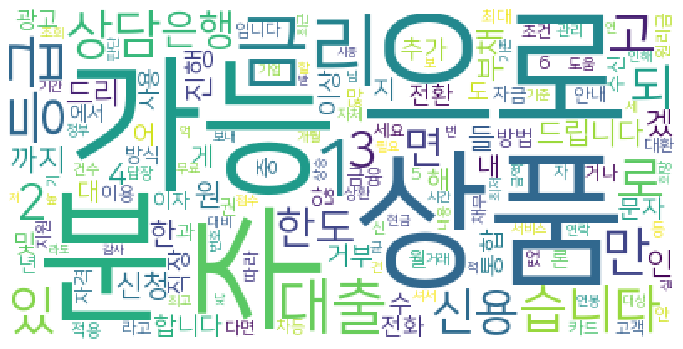

In [20]:
word_cloud(vocab_sm)